# Quantum walks Université Bordeaux

Dauliac julien
<p align="center">
  <img width="460" height="300" src="./assets/img/Universite-Bordeaux.png">
</p>


In [110]:
from rich import print

import numpy as np
from matplotlib import pyplot as plt
import scipy
import scipy.special

# Table of content 📖

- Classical Random walks and Markov chains
- Quantum walks

## Classical Random walks and Markov chains ⛓️

Markov chains are a mathematical tool describing probabilistic dynamic systems.

They play an important role in randomized algorithms

<p align="center">
  <img width="420" src="./assets/img/random_walk.gif">
</p>


## Let's walk 🚶‍♂️
   
We will simulate a random walk to observe these properties 

In [111]:
import random # Our piece to choice walker direction

steps_number = 50    # Defines the total number of steps our walker will take
direction_probability = 0.5  # Defines the probability of our walker stepping to the right
initial_position = 0     # Defines the initial position of our walker

In [112]:
def random_walk(direction_probability: float, steps_number: int, initial_position: int):
    position = initial_position
    # Repeatedly queries our random variable and moves our walker for the specified number of steps
    for j in range(steps_number):
        # Flips our coin
        coin_flip = np.random.choice(2, 1, p=[1-direction_probability, direction_probability])[0]
        position += 2*coin_flip-1 # Moves our walker according to the coin flip 
    
    return position

walker_position = random_walk(direction_probability, steps_number, initial_position)
print("The walker is located at: x = {var}".format(var = walker_position))

The walker is located at: x = -4

### Distribution 📊

Let's display the distribution of our steps

In [216]:
def dist(runs, steps_number, direction_probability: float, initial_position: int):
    positions = range(-1*steps_number, steps_number+1)
    instances = [0 for i in range(-1*steps_number, steps_number+1)]
    for k in range(runs):
        result = random_walk(direction_probability, steps_number, initial_position)
        instances[positions.index(result)] += 1
    plt.bar(positions, [n/runs for n in instances])
    plt.show()

### Distribution 📊

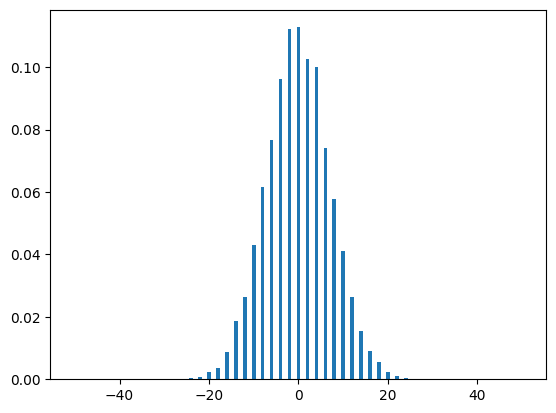

In [217]:
dist(10000, steps_number, direction_probability, initial_position)

Plus le temps sera long, plus la distribution, l'équart type sera large.


### Comparison with the theory 🆚

Our simulation look pretty binomial


We can now plot the distribution predicted in the math, and see if the two are the same...

### Comparison with the theory 🆚

In [115]:
def binomial_height(position: int, steps_number: int, direction_probability: float):
    a = (steps_number + position)/2
    b = (steps_number - position)/2
    if (position%2 == 0):
        result = scipy.special.binom(steps_number, a)*(direction_probability**a)*((1-direction_probability)**b)
    else:
        result = 0
    return result

### Comparison with the theory 🆚

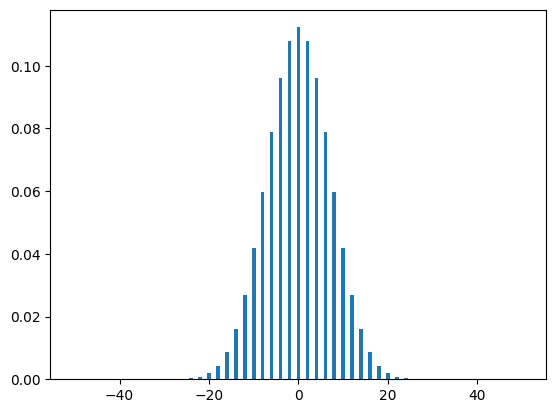

In [116]:
positions = range(-1*steps_number, steps_number+1)
heights = [binomial_height(
    position, 
    steps_number,
    direction_probability) for position in positions]
plt.bar(positions, heights)
plt.show()

Both are both are binomial 🎊 !

## Quantum walks ⚛️

Quantum walks are random walks equivalent in quantic world.

<p align="center">
  <img width="700" src="./assets/img/forked-graph.png">
</p>



## Quantum walks ⚛️

<p align="center">
  <img width="800" src="./assets/img/schema3.png">
</p>

The unobserved quantum walkers,
not being in a defined state, move following an amplitude probability or "simultaneously" according to their statistical distribution to all possible next nodes:

### Quantum walks applications
- Random walks discrete 📊
- Random walks continuous 📈
- Search algorithm 🔍
- Physical simulations 🔬
- Finance 💰

### Quantum walks complexity

Normal world:
$$ cost_c = O(\frac{1}{n}) $$

Quantic world:
$$ cost_q =  \frac{1}{\sqrt{n}}$$


## Let's quantum walk ⚛️

<p align="center">
  <img width="600" src="./assets/img/schema1-bis.png">
</p>

## Let's quantum walk ⚛️


In [95]:
# Qbits simulation
import cirq

number_qubits = 7
qubits = cirq.GridQubit.rect(1, number_qubits)

print(qubits)

[
    cirq.GridQubit(0, 0),
    cirq.GridQubit(0, 1),
    cirq.GridQubit(0, 2),
    cirq.GridQubit(0, 3),
    cirq.GridQubit(0, 4),
    cirq.GridQubit(0, 5),
    cirq.GridQubit(0, 6)
]

### Initialisation
- 🚶 is almost central central position (qbit 0)
- 🪙 is in $\lvert\downarrow\rangle$ state *( $\lvert1\rangle$ )*


In [96]:
def initial_state():
    # Initalize🚶 position using the Pauli X gate.
    yield cirq.X.on(cirq.GridQubit(0, 1))
    # Initalize🪙 in |⬇️> state using the Pauli X gate.
    yield cirq.X.on(cirq.GridQubit(0, number_qubits))

### Our operators 👷‍♂️

```python
def walk_step():
    ...
```

<img width="750" src="./assets/img/schema2.png">

In [97]:
def walk_step():
    # Flip the 🪙
    yield cirq.H.on(cirq.GridQubit(0, number_qubits))

    # 🚶➕ Implement the Addition Operator 
    yield cirq.X.on(cirq.GridQubit(0, number_qubits))

    for i in range(number_qubits, 0, -1):
        controls = [cirq.GridQubit(0, v) for v in range(number_qubits, i-1, -1)]
        yield cirq.X.on(cirq.GridQubit(0, i-1)).controlled_by(*controls)
        if (i > 1):
            yield cirq.X.on(cirq.GridQubit(0, i-1))

    yield cirq.X.on(cirq.GridQubit(0, number_qubits))

    #🚶➖ Implement the Substraction Operator
    for i in range(1, number_qubits+1):
        controls = [cirq.GridQubit(0, v) for v in range(number_qubits, i-1, -1)]
        yield cirq.X.on(cirq.GridQubit(0, i-1)).controlled_by(*controls)
        if (i < number_qubits):
            yield cirq.X.on(cirq.GridQubit(0, i))

In [98]:
def generate_walk(number_qubits: int, iterator:int , sample_number: int):
    circuit = cirq.Circuit()

    circuit.append(initial_state())
    for j in range(iterator):
        circuit.append(walk_step())
    circuit.append(cirq.measure(*qubits, key='x'))

    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=sample_number)
    final = result.histogram(key='x')

    return final

### Run our walker 🏃‍♂️ 

In [99]:
number_qubits = 7
iterator = 30
sample_number = 5000


final = generate_walk(number_qubits, iterator, sample_number)

In [103]:
def graph(final):

    x_arr = list(final.keys())
    y_arr = [dict(final)[j] for j in dict(final).keys()]

    x_arr_final = []
    y_arr_final = []

    while (len(x_arr) > 0):

        x_arr_final.append(min(x_arr))
        y_arr_final.append(y_arr[x_arr.index(min(x_arr))])
        holder = x_arr.index(min(x_arr))
        del x_arr[holder]
        del y_arr[holder]

    plt.plot(x_arr_final, y_arr_final)
    plt.scatter(x_arr_final, y_arr_final)
    plt.show()

### Results

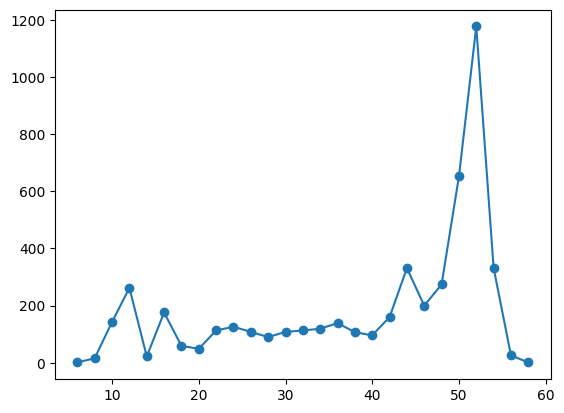

In [105]:
graph(final)

### Results
If we invert 🪙 state:
- 🚶 is almost central central position (qbit 0)
- 🪙 is in $\lvert\downarrow\rangle$ state *( $\lvert1\rangle$ )*

### Results

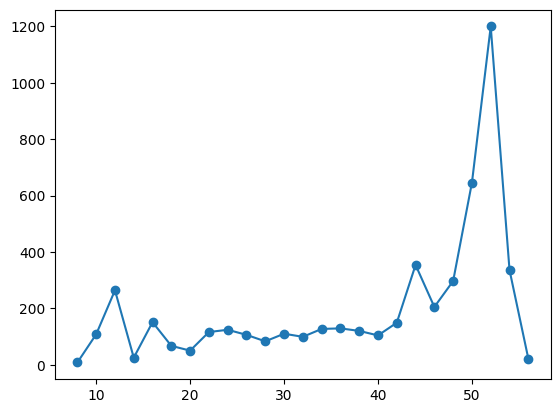

In [106]:
# Override initial state
def initial_state():
    # Initalize🚶 position using the Pauli X gate.
    yield cirq.X.on(cirq.GridQubit(0, 1))
    # Keep 🪙 in |⬆️> state using the Pauli X gate.
    #yield cirq.X.on(cirq.GridQubit(0, number_qubits))
    
final = generate_walk(number_qubits, iterator, sample_number)
graph(final)

### Interferences 🔀 

<img width="600" src="./assets/img/schema4.png">

### Without biaises ↕️

We will set our initial state to:


$$|i\rangle \ = \ \frac{|\uparrow\rangle \ + \ i|\downarrow\rangle}{\sqrt{2}}$$


This is implemented by applying a Hadamard gate to $|\uparrow\rangle$, and then applying an $S$ gate to 
the qubit.

### Without biaises ↕️

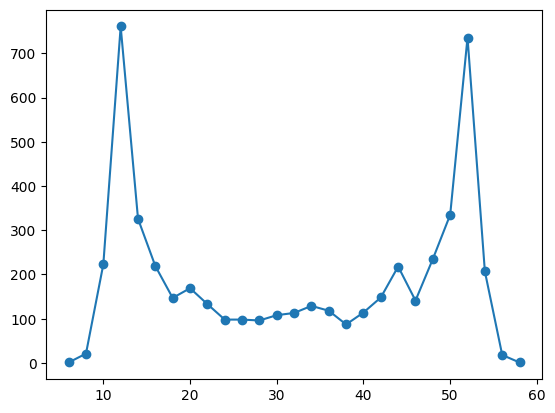

In [109]:
def initial_state():
  # Initalize🚶 position using the Pauli X gate.
    yield cirq.X.on(cirq.GridQubit(0, 1))
    
    # Set 🪙 in |↕️> state.
    # Hadamar gate
    yield cirq.H.on(cirq.GridQubit(0, number_qubits))
    # S gate
    yield cirq.S.on(cirq.GridQubit(0, number_qubits))

final = generate_walk(number_qubits, iterator, sample_number)
graph(final)

### Cost and speed 💸

- $\sigma$ is the standard deviation
- $T$ is the number of time steps

In the case of a classical random walk, we can observe $\sigma^2 \sim T$ where .

In the case of a quantum walk $\sigma^2 \sim \ T^2$.


Cela signifie que l'écart-type dans le cas d'un marcheur quantique croît quadratiquement plus vite.

Le marcheur quantique explore, s'étend quadratiquement plus vite que le marcheur classique.


<p align="center">
  <img width="900" src="./assets/img/thank_you.gif
">
</p>



## References
[sources](https://github.com/Dauliac/Quantum-random-walks)

[forked from](https://quantumai.google/cirq/experiments/quantum_walks)

Filled with content of [this document](https://www.overleaf.com/read/gtdyjkykkprn)